# **MICROSOFT MOVIE STUDIO**
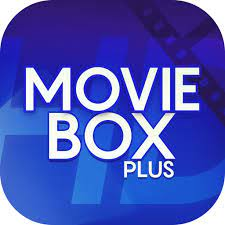

## **Project Overview**
![Overview pic](https://preview.redd.it/2jhtmqhg4mo81.png?width=1920&format=png&auto=webp&s=0d41709c3c478d2bcadfd8f2450271f175c0676f)

The project entails a comprehensive analysis of market trends, audience preferences, and cultural dynamics to strategically determine the ideal types of films to produce. Through meticulous research and data-driven insights, the project aims to identify and understand the target demographic, their evolving entertainment needs, and the prevailing themes and genres that resonate with them. By incorporating elements of predictive analytics and trend forecasting, the project seeks to enable Microsoft Studio to make informed decisions about the creation of compelling, innovative, and culturally relevant films that have the potential to captivate and engage audiences worldwide. Additionally, by considering the broader social and cultural landscape, the project will assist Microsoft in the development of a coherent and diverse film portfolio that reflects the values, aspirations, and diverse experiences of contemporary society.

## **Business Problem**
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The aim of this project is to explore what types of films are currently doing the best at the box office. The findings will be translated into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## **Understanding the Data**
The project involves a comprehensive examination of various key metrics, including audience ratingss, box office performance, audience reviews, domestic and foreign market trends, audience preferences, viewing patterns, and emerging thematic interests. By studying the performance of comparable films in the market, Microsoft Studio can make data-driven decisions about budget allocation, production strategies, and marketing campaigns, ultimately optimizing the chances of creating commercially successful and critically acclaimed films that resonate with the intended audience. The following data was used:
 *Box Office Mojo
 *IMDB
 *Rotten Tomatoes
 *TheMovieDB.org

In [49]:
final_concat.isna().sum()

tconst                  0
averagerating       72288
numvotes            72288
start_year              0
runtime_minutes     31739
genres               5408
studio             142762
domestic_gross     142785
foreign_gross      144112
year               142757
dtype: int64

In [1]:
import pandas as pd
import numpy as np

In [2]:
gross = pd.read_csv('bom.movie_gross.csv')
reviews = pd.read_csv('reviews.csv')
basics = pd.read_csv('title.basics.csv')
ratings = pd.read_csv('title.ratings.csv')

### **Checking the Datasets**
The project will utilize the above four datasets

#### **Gross Dataset**

In [3]:
# The first dataset is gross and we are going to look into the information, shape and check if the dataset has any null values
#Checking gross information
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#checking the shape of gross dataset
gross.shape

(3387, 5)

In [5]:
#checking the summary of gross datase
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### **Reviews Dataset**

In [7]:
# We are now going to check the information, shape and null values of the reviews dataset
#checking the information of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    id         54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [8]:
#checking the shape of reviews dataset
reviews.shape

(54432, 8)

In [9]:
#checking the null values of reviews dataset
reviews.isna().sum()

 id               0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [18]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### **Basics Dataset**

In [10]:
# Next, we check the info, shape and null values of basics dataset
# check info of basics dataset
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
#check the shape of basics dataset
basics.shape

(146144, 6)

In [12]:
# Check the null values of basics dataset
basics.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [19]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### **Ratings Dataset**

In [13]:
# Lastly, we check the info, shape and null values of ratings dataset
# Check the ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
#check the columns of ratings dataset
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
# check the shape of ratings dataset
ratings.shape

(73856, 3)

In [16]:
# check the null values in ratings dataset
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

## **Data Preparation**

### **Data Cleaning**
In this section, I am going to handle missing data points and outliers, standardize data formats and units and transform data into a usable format for analysis, ensuring data quality and consistency.

In [20]:
#change foreign_gross in the grosss dataset from object to float
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'], errors='coerce')

In [21]:
# Normalize the columns
normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

In [22]:
#specify the columns to normalize
columns_to_normalize = ['domestic_gross', 'foreign_gross', 'year', 'runtime_minutes']

In [27]:
#drop columns that I dont need for my analysis
basics.drop(columns = ['primary_title', 'original_title'], inplace=True )

### **Merging Datasets**

In [28]:
# merge basics and ratings datasets using outer join and give it the variable name merge_data 
merge_data = pd.merge(ratings, basics, on='tconst', how='outer')

In [31]:
# join the merge_data and gross datasets using concatenate. Give it the variable name _final_concat 
final_concat = pd.concat([merge_data, gross], axis = "columns")

In [32]:
# Drop rows with missing values in the 'averagerating' and 'numvotes' columns
final_concat_cleaned = final_concat.dropna(subset=['averagerating', 'numvotes'])

In [33]:
# Fill missing values in other columns ('studio','domestic_gross', 'foreign_gross' and 'year')   
final_concat_cleaned = final_concat_cleaned.fillna(0)

In [35]:
# confirm if there is still any missing values
final_concat_cleaned.isna().sum()

tconst             0
averagerating      0
numvotes           0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [36]:
final_concat_cleaned.head()

,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt10356526,8.3,31.0,2019,117.0,Romance,BV,415000000.0,652000000.0,2010.0
1,tt10384606,8.9,559.0,2019,87.0,Documentary,BV,334200000.0,691300000.0,2010.0
2,tt1042974,6.4,20.0,2010,90.0,Drama,WB,296000000.0,664300000.0,2010.0
3,tt1043726,4.2,50352.0,2014,99.0,"Action,Adventure,Fantasy",WB,292600000.0,535700000.0,2010.0
4,tt1060240,6.5,21.0,2011,73.0,"Mystery,Thriller",P/DW,238700000.0,513900000.0,2010.0


## **Exploratory Data Analysis**
In this section, I am going to explore the collected data to identify trends and patterns in successful movie genres, trends, and audience preferences. Visualisations will also be used to uncover meaningful insights and make informed decisions in order to advise our client Microsoft accordingly.

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline

### **Runtime vs choice of a movie**
The number of ratings based on runtime is not that significant meaning that runtime does not affect an individuals preference of a movie

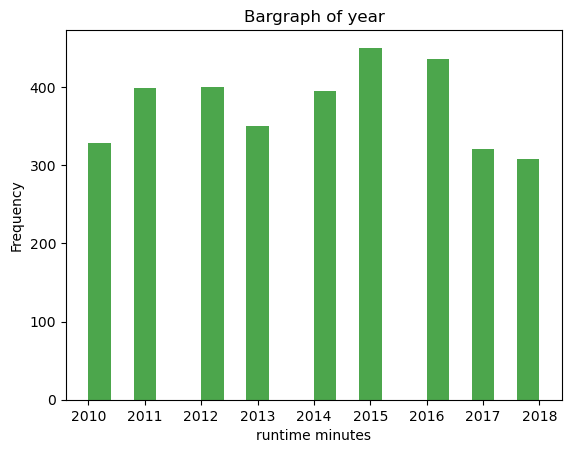

In [38]:
# histogram showing average ratings
plt.hist(final_concat['year'], bins=20, alpha=0.7, color='green')
plt.xlabel('runtime minutes')
plt.ylabel('Frequency')
plt.title('Bargraph of year')
plt.show()

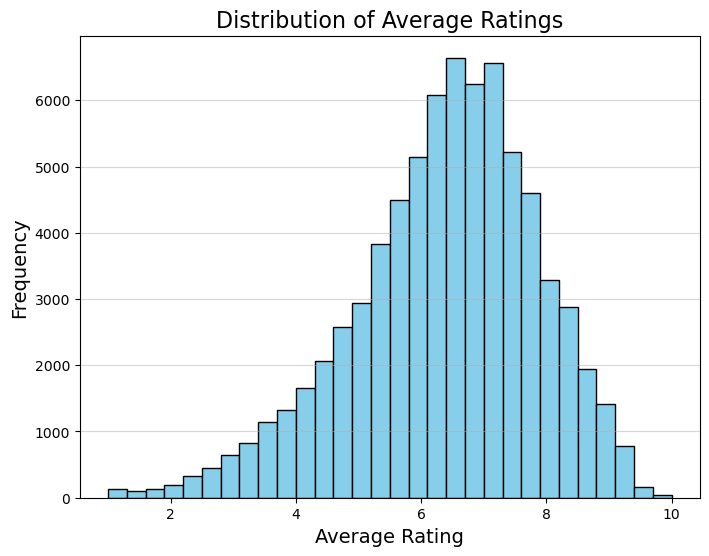

In [39]:
#histogram showing distribution of average ratings
plt.figure(figsize=(8, 6))
plt.hist(final_concat['averagerating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.show()

### **Prefered Movie Genre**
The results indicate that the most prefered movie genre is drama followed by documentary, comedy, thriller and horror in that order. Therefore, the client, Microsoft, can be advised to leverage this information to target popular genres and explore opportunities for diversification to cater to a wider audience.

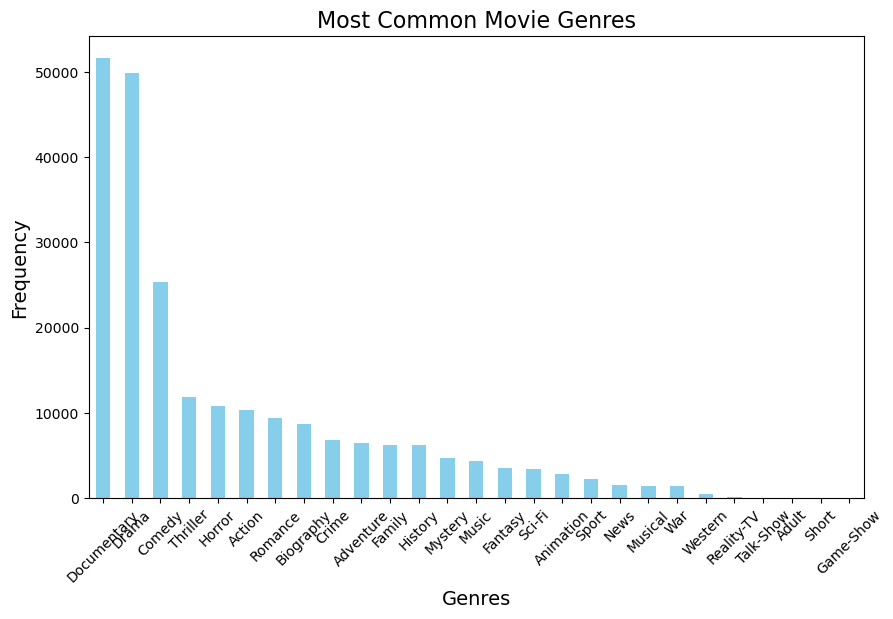

In [41]:
# Most common movie genres
final_concat_genres = final_concat['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
final_concat_genres.plot(kind='bar', color='skyblue')
plt.title('Most Common Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### **Runtime and Domestic Gross**
The results iindicate that there is no relationship between runtime and domestic gross, meaning that the length of the movie does not affect sales

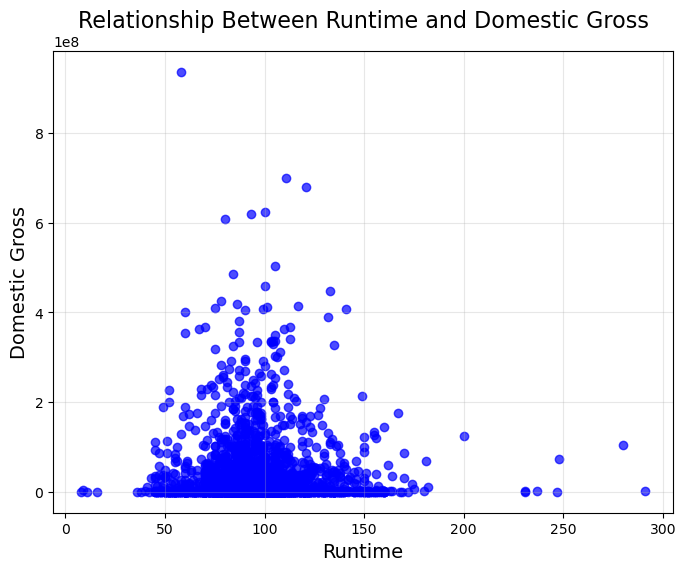

In [47]:
# Relationship between runtine and domestic gross
plt.figure(figsize=(8, 6))
plt.scatter(final_concat['runtime_minutes'], final_concat['domestic_gross'], color='blue', alpha=0.7)
plt.title('Relationship Between Runtime and Domestic Gross', fontsize=16)
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Domestic Gross', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### **Sales**
The results indicate a positive correlation between domestic and foreign gross. This means that the locality does not affect the sales 

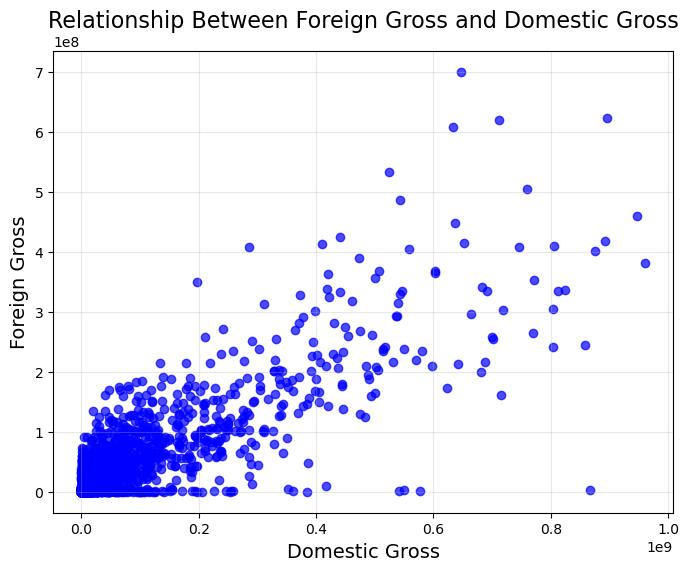

In [43]:
# Relationship between foreign gross and domestic gross
plt.figure(figsize=(8, 6))
plt.scatter(final_concat['foreign_gross'], final_concat['domestic_gross'], color='blue', alpha=0.7)
plt.title('Relationship Between Foreign Gross and Domestic Gross', fontsize=16)
plt.xlabel('Domestic Gross', fontsize=14)
plt.ylabel('Foreign Gross', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### **Trend in Movie Production**
The results help to forecast based on the flactuating trend of movie production. This could be an indicator that the business is no longer lucrative and the producers could be moving away from this businesses. It is important to understand the reasons behind these fluctuations such as industry trends. This can help Microsoft make informed decisions about production timelines and release schedules.

C:\Users\CHEBBY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CHEBBY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CHEBBY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CHEBBY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

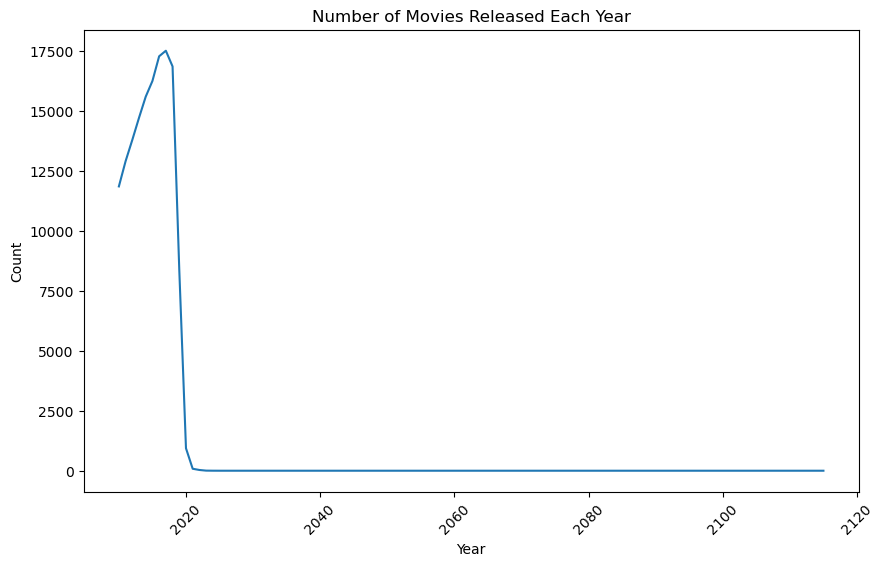

In [44]:
# Trend in the number of movies released since 2010
year_counts = final_concat['start_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Trends in Ratings and Number of Votes**
From the results, the average ratings has remained constant over the years while the number of votes has taken a downward trend. This could be an indicator that people are no longer interested in watching movies. If Microsoft should venture into this business thhen they should up their game and produce high quality content to sustain audience interest and engagement. Moreover, the declining number of votes for movies may be an indicator of a potential shift in audience engagement patterns. This should be considered by Microsoft when planning marketing and promotional strategies.

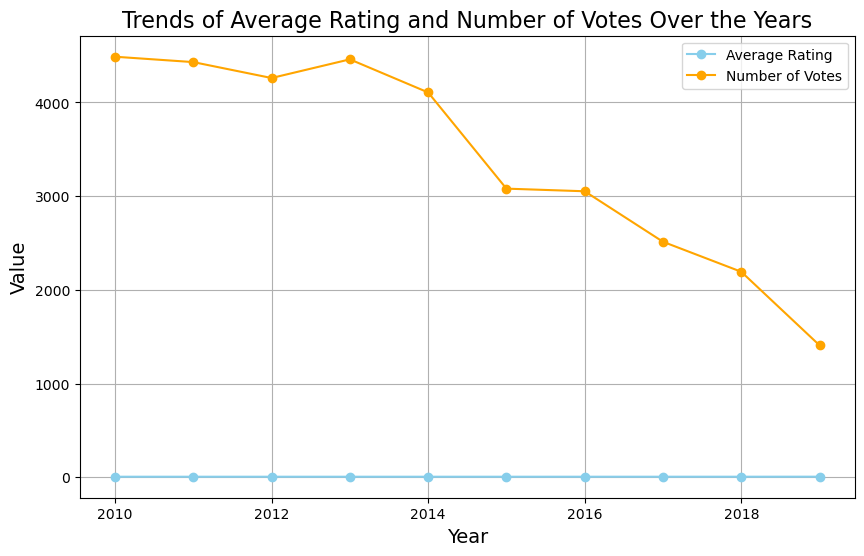

In [45]:
# Group by 'start_year' and calculate the mean of 'averagerating' and 'numvotes'
grouped_data = final_concat.groupby('start_year')[['averagerating', 'numvotes']].mean()

# Data for the plot
start_year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
average_rating = [6.259585, 6.290134, 6.297057, 6.287259, 6.319806, 6.265894, 6.347300, 6.397624, 6.415599, 6.703578]
num_votes = [4488.480418, 4431.113953, 4261.238932, 4460.397622, 4107.310238, 3080.688721, 3052.597523, 2513.674280, 2193.447914, 1408.505046]

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(start_year, average_rating, marker='o', linestyle='-', color='skyblue', label='Average Rating')
plt.plot(start_year, num_votes, marker='o', linestyle='-', color='orange', label='Number of Votes')
plt.title('Trends of Average Rating and Number of Votes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## **Conclusion**
In conclusion, based on the analysis of the movie industry data, it is evident that certain factors play a crucial role in determining the success of movies at the box office. The exploration of the this data revealed valuable insights that can guide Microsoft in establishing its new movie studio and understanding the dynamics of the industry.With these insights, Microsoft can strategically plan its entry into the movie industry, focusing on producing high-quality content within popular genres while prioritizing audience preferences. 